In [47]:
import sys
sys.path.append("../")

import torch
from pytorch.model import  UNet
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# load model
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = UNet(input_filters=1, filters=64, N=2).to(device)
model = torch.nn.DataParallel(model)
model.load_state_dict(torch.load("pytorch/trained/segmentation_mixed_augmented_UNet_1603993442.097638.pth"))
model.eval()

DataParallel(
  (module): UNet(
    (block1): Sequential(
      (0): Sequential(
        (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (1): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
    (block2): Sequential(
      (0): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (1): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [156]:
# load image
image = cv2.imread("C:\\Users\\ESST\\development\\CartridgeCounting\\cartridge_counting\\data\\labelled_green_caps_blurry\\10.jpg", 0)

In [157]:
image.shape

(1536, 2048)

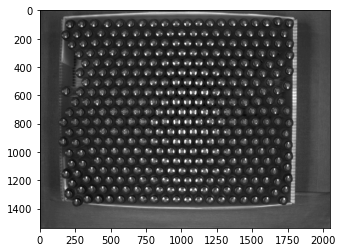

In [24]:
plt.imshow(image, cmap='gray')

In [25]:
resized_image = cv2.resize(image, (256,256))

In [165]:
tensor_image = torch.unsqueeze(torch.unsqueeze(torch.Tensor(resized_image), 0),0)/255.0
prediction = model(tensor_image)[0,0].cpu().detach().numpy() > 0.5
# find centers
contours,hierarchy = cv2.findContours(prediction.astype(np.uint8)*255, 1, 2)
def find_center(contour):
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    return cx, cy

centers = [find_center(contour) for contour in contours]

adjusted_circles = [(int((x/256)*2048), int((y/256)*1536)) for (x,y) in centers]


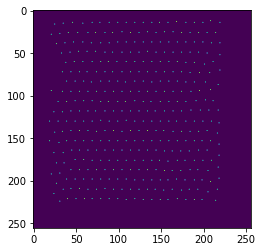

In [166]:
dots = np.zeros((256,256))
for (y,x) in centers:
    dots[x,y] = 255

plt.imshow(dots)

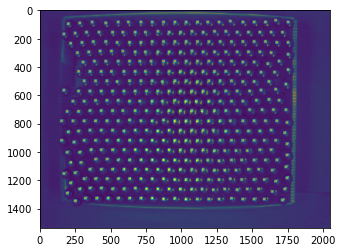

In [175]:
dots = np.zeros((1536,2048))
for (y,x) in adjusted_circles:
    dots[x-10:x+10,y-10:y+10] = 255

plt.imshow(image)
plt.imshow(dots, alpha=0.5)


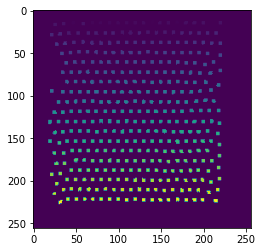

In [103]:
plt.imshow(comps)

In [183]:
net = load_model("C:\\Users\\ESST\\development\\CartridgeCounting\\annotation_tool\\models\\segmentation_mixed_augmented_UNet_1604044090.034343.pth"
        )

NameError: name 'load_model' is not defined